# Full Analysis of Thai Food Dataset

1.  **Food Lookup**: A function to input a dish name and get its details.
2.  **Common Ingredients Analysis**: Find the most popular ingredients.
3.  **Regional Analysis**: Count dishes by region and province.
4.  **Course Type Analysis**: Show the breakdown of dishes by course.

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('thai_dish_filled_complete.csv')

In [4]:
df

,en_name,th_name,ingredients,course,province,region
0,Koi,ก้อย,Beef+lime juice+fish sauce+chili+herbs,main dish,Ubon Ratchathani,Northeast
1,Kuai Chap,กวยจั๊บ,Pork belly+rice noodles+soy sauce+garlic,main dish,Bangkok,Central
2,Kuai Tiao,ก๋วยเตี๋ยว,Rice noodles+pork+bean sprouts+garlic+fish sauce,main dish,Bangkok,Central
3,Kuai Tiao Khaek,ก๋วยเตี๋ยวแขก,Beef+noodles+curry powder+coconut milk,main dish,Ayutthaya,Central
4,Kuai Tiao Kua Kai,ก๋วยเตี๋ยวคั่วไก่,Chicken+noodles+soy sauce+garlic,main dish,Bangkok,Central
...,...,...,...,...,...,...
319,Ang Ku,อังกู๊,Glutinous rice cakes+mung‑bean filling (Hokkie...,dessert,Phuket,South
320,A Kao,อาเกาะ,Eggs+Coconut Milk+Palm Sugar+Rice Flour,dessert,Pattani,South
321,A Law,อาละหว่า,Alua candy+flour+coconut milk+sugar,dessert,Phetchaburi,Central
322,O Aew,โอ้เอ๋ว,Banana‑seed jelly+shaved ice+syrup,dessert,Phuket,South


## 1. Food Lookup by Name (with Input)

In [5]:
def get_food_details(food_name):
    if 'df' not in globals():
        print("Error: The dataframe 'df' is not loaded.")
        return
    # Search for the food, ignoring case
    food_item = df[df['en_name'].str.lower() == food_name.lower()]
    
    if food_item.empty:
        print(f"\n--- Result for '{food_name}' ---")
        print("Sorry, that food was not found in the dataset.")
    else:
        #first match
        name = food_item.iloc[0]['en_name']
        ingredients_raw = food_item.iloc[0]['ingredients']
        region = food_item.iloc[0]['region']
        
        # Format the ingredients
        ingredient_list = ingredients_raw.replace('+', ', ')
        
        print(f"\n--- Result for '{food_name}' ---")
        print(f"Food: {name}")
        print(f"Region: {region}")
        print(f"Ingredients: {ingredient_list}")

In [6]:
dish_name = input("Enter a dish name to look up: ")
get_food_details(dish_name)

Enter a dish name to look up:  Koi



--- Result for 'Koi' ---
Food: Koi
Region: Northeast
Ingredients: Beef, lime juice, fish sauce, chili, herbs


## 2. Common Ingredients Analysis

--- Top 15 Most Common Ingredients ---
sugar: 76
coconut milk: 73
herbs: 71
garlic: 57
flour: 43
rice flour: 35
fish sauce: 31
meat: 29
soy sauce: 28
pork: 27
vegetables: 25
spices: 21
fish: 13
chili: 11
coconut: 11


/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_28207/988495246.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_ingredients, x='Count', y='Ingredient', palette='viridis')


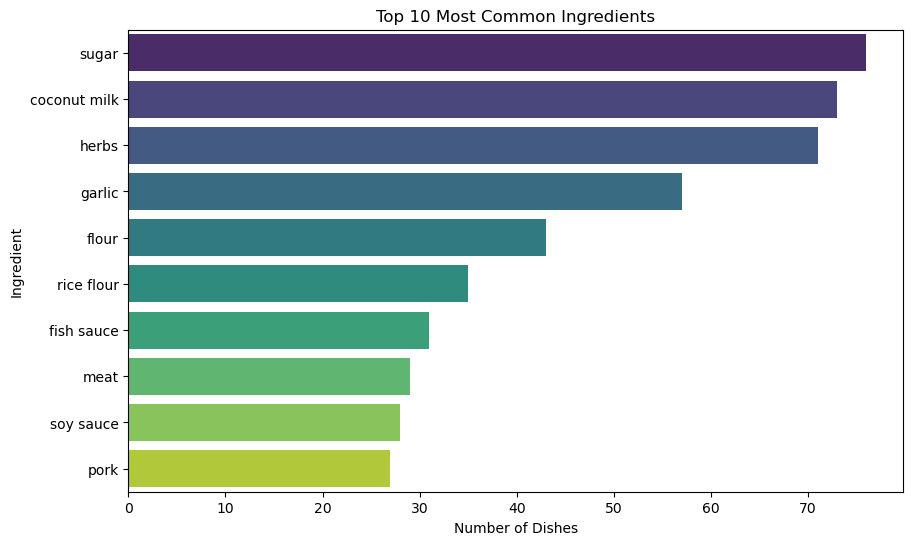

In [7]:
# Split 
all_ingredients = []
for item in df['ingredients']:
    # all lowercase
    all_ingredients.extend(item.lower().split('+'))

ingredient_counts = Counter(all_ingredients)

print("--- Top 15 Most Common Ingredients ---")
for ingredient, count in ingredient_counts.most_common(15):
    print(f"{ingredient}: {count}")

# top 10 ingredients
top_10_ingredients = pd.DataFrame(ingredient_counts.most_common(10), columns=['Ingredient', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_ingredients, x='Count', y='Ingredient', palette='viridis')
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Number of Dishes')
plt.ylabel('Ingredient')
plt.show()

In [8]:
total_dishes = len(df)

sugar_dishes = []

for index, row in df.iterrows():
    ingredients = str(row['ingredients']).lower()
    
    if 'sugar' in ingredients.split('+'):
        sugar_dishes.append(row['en_name'])

sugar_count = len(sugar_dishes)

print(f"Out of {total_dishes} total dishes, {sugar_count} dishes list 'sugar' as an ingredient.")

print("\n--- Dishes Containing Sugar ---")
for dish in sugar_dishes:
    print(dish)

Out of 324 total dishes, 76 dishes list 'sugar' as an ingredient.

--- Dishes Containing Sugar ---
Krabong
Kanom Kheng
Kanom Tokyo
Kanom Pang Ka Kai
Khrong Khrang Krop
Khang Khao Pueak
Salapao
Pla Haeng Tang Mo
Pa Thong Ko
Ma Ho
Roti
Kraya Sadt
Kluay Kaek
Kluay Buat Chi
Klub Lamduan
Kalamae
Kaeng Buat
Kanom Gong
Kanom Grok
Kanom Ko
Kanom Geson Lam Chiek
Kanom Kee Nu
Kanom Kheaw
Kanom Khai
Kanom Khai Nok Krata
Kanom Khai Hong
Kanom Krok
Kanom Kui Ling
Kanom Chak
Kanom Jor Hu
Kanom Chamod
Kanom Chan
Kanom Tom
Kanom Thuai
Kanom Thang Taek
Kanom Tua Paeb
Kanom Thien
Kanom Nam Dok Mai
Kanom Ba Bin
Kanom Beung
Kanom Pia
Kanom Ping
Kanom Farang Kudi Chin
Kanom Piak Pun
Kanom Man Sampalang
Kanom Luem Gluen
Kanom Wong
Kanom Mor Kaeng
Kanom Hua Lan
Khao Jee
Khao Daek Nga
Khao Tom Nam Woon
Khao Tu
Khao Pong
Khao Ya Khu
Khao Lam
Ja Mongkut
Chao Kuai
Sa Rim
Dara Thong
Tau Huai
Thu Kiao Tom Nam Tan
Thong Muon
Thong Yod
Thong Yip
Thong Ek
Phi Tai Wak
Foi Thong
Fak Khiao Kwan
Mamoung Kwan
Maskot
Med K

## 3. Regional Analysis

--- Regional Analysis ---

Dishes per Region:
region
Various      148
Central       95
South         35
Northeast     18
North         18
Northern       5
Southern       4
Eastern        1
Name: count, dtype: int64


/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_28207/696104091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='region', order=df['region'].value_counts().index, palette='Spectral')


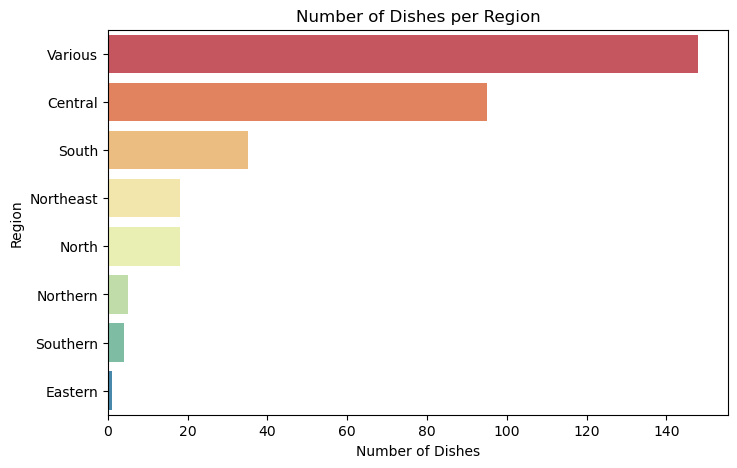


Dishes per Province (Top 15):
province
Various                148
Bangkok                 67
Central provinces       11
Northern provinces      11
Southern provinces      11
Chiang Mai              10
Phuket                   7
Pattani                  7
Northeast provinces      6
Ayutthaya                5
Phetchaburi              5
Songkhla                 4
Ubon Ratchathani         4
Coastal provinces        3
Rural areas              2
Name: count, dtype: int64


In [9]:
print("--- Regional Analysis ---")

# Count dishes per region
print("\nDishes per Region:")
print(df['region'].value_counts())

# Plot the regional breakdown
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='region', order=df['region'].value_counts().index, palette='Spectral')
plt.title('Number of Dishes per Region')
plt.xlabel('Number of Dishes')
plt.ylabel('Region')
plt.show()

# Count dishes per province
print("\nDishes per Province (Top 15):")
print(df['province'].value_counts().head(15))

## 4. Course Type Analysis

--- Course Type Analysis ---
course
main dish    173
snack         79
dessert       69
salad          2
soup           1
Name: count, dtype: int64


/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_28207/4019876830.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_counts.index, y=course_counts.values, palette='pastel')


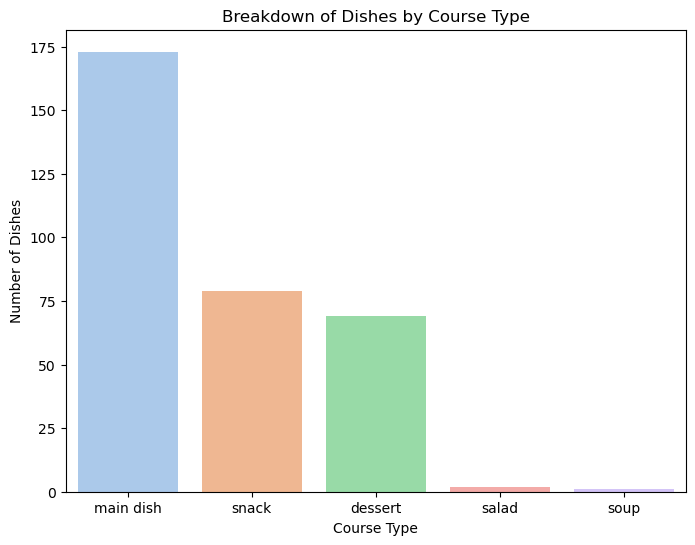

In [10]:
print("--- Course Type Analysis ---")

# Count dishes per course
course_counts = df['course'].value_counts()
print(course_counts)

# bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=course_counts.index, y=course_counts.values, palette='pastel')
plt.title('Breakdown of Dishes by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Number of Dishes')
plt.show()